In [1]:
#importing important libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the datasets by using pandas library
coursera_df=pd.read_csv("coursea_data.csv")
review_df=pd.read_csv("reviews.csv")
courses_df=pd.read_csv("courses.csv")
udemy_df=pd.read_csv("udemy_courses.csv")

# Coursera Data EDA

In [3]:
#info() is used to get all the information about the dataset
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


The dataset consists of 7 columns and 891 rows.
There are no null values in the dataset.
There are 5 columns of object datatype , 1 column of integer dtatype nd 1 column of float datatype.

In [4]:
#describe() is used to get the computations of all the numeric data
coursera_df.describe()

Unnamed: 0  course_rating
count  891.000000     891.000000
mean   445.000000       4.677329
std    257.353842       0.162225
min      0.000000       3.300000
25%    222.500000       4.600000
50%    445.000000       4.700000
75%    667.500000       4.800000
max    890.000000       5.000000

The maximum rating for a course is 5.0 and the minimum rating is 3.3

In [5]:
#head() displays the top 5 rows of thhe dataset
coursera_df.head()

Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolkit   
4         635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty course_students_enrolled  
0          Beginner                     5.3k  
1      Intermediate                      17k  
2             Mixed                     130k  
3             Mixed                      91k  
4             Mixed                     320k

### Changing course_students_enrolled values to make easier format for analysis such as 53k into 53,000

In [6]:
coursera_df['course_students_enrolled'] = coursera_df['course_students_enrolled'].str.replace('k', '*1000')
coursera_df['course_students_enrolled'] = coursera_df['course_students_enrolled'].str.replace('m', '*1000000')
coursera_df['course_students_enrolled'] = coursera_df['course_students_enrolled'].map(lambda x: eval(x))

In [7]:
#converting the course_students_enrolled datatype from object to integer
coursera_df=coursera_df.astype({'course_students_enrolled':int})

In [8]:
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 45.4+ KB


In [9]:
coursera_df['course_Certificate_type'].value_counts()

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

# Which University is providing the most courses

In [10]:
df = pd.value_counts(coursera_df['course_organization'])/sum(pd.value_counts(coursera_df['course_organization']))*100
data2 = {'Organization': df.keys(),'Ratio': df[df.keys()]}
df2 = pd.DataFrame(data2)
df2 = df2[df2['Ratio']>0.7]
r = 100-df2['Ratio'].sum()
labels = df2['Organization'].unique()

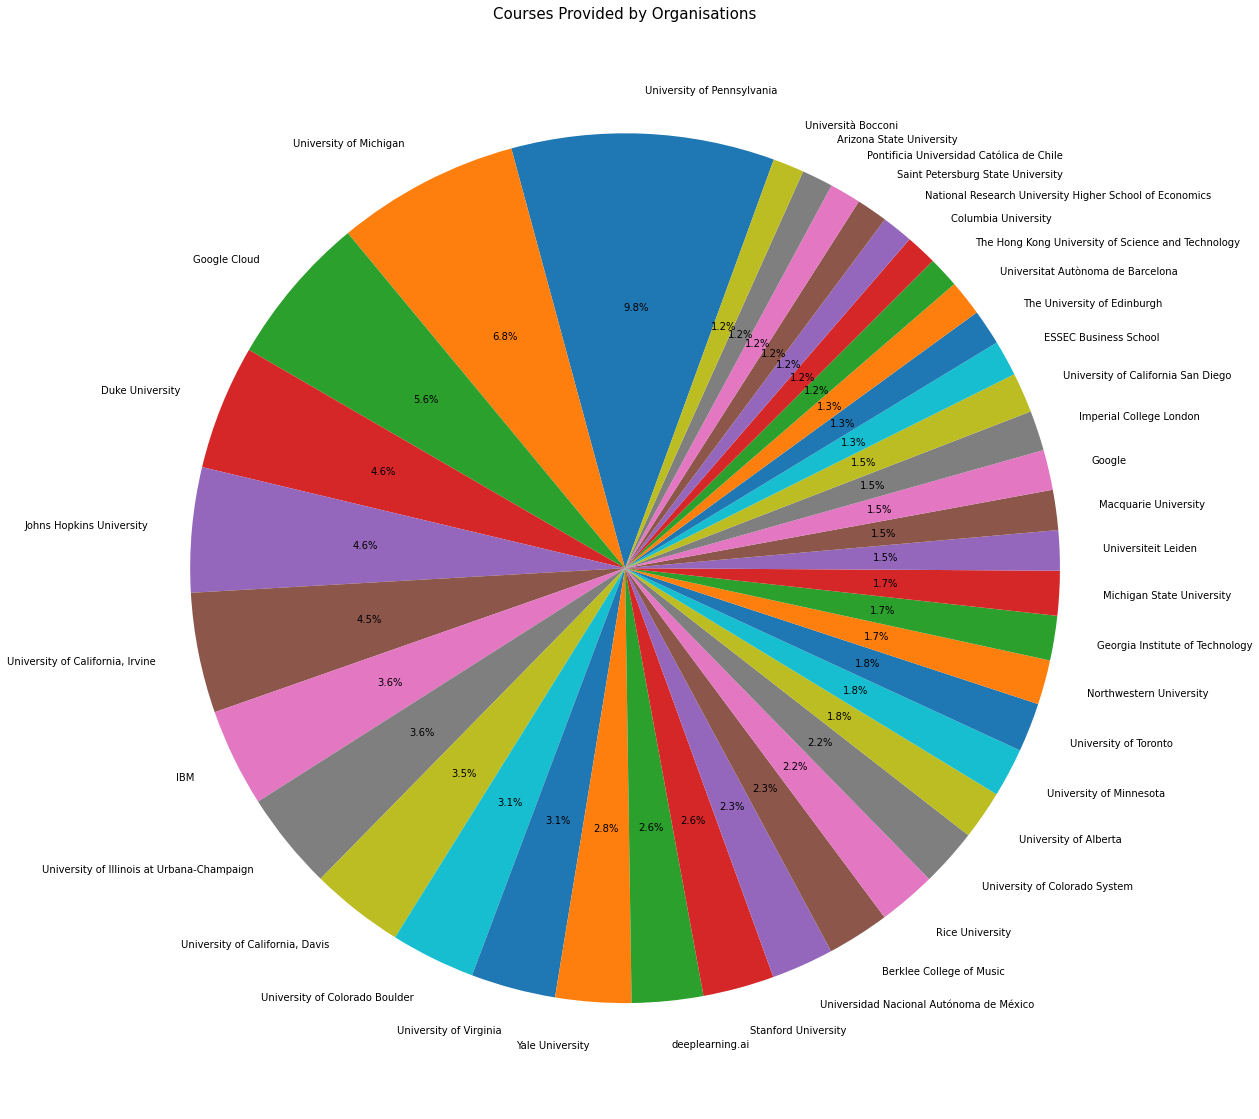

In [11]:
pie, ax = plt.subplots(figsize=[20,20])
labels = df2['Organization'].unique()
plt.pie(x=df2['Ratio'], autopct="%.1f%%", labels=labels, pctdistance=.6,startangle=70)
plt.title("Courses Provided by Organisations", fontsize=15);
plt.show()

In [12]:
#To find which universitiess provide more than 10 courses
def find_org_more_than_10(coursera_df):
    """Returns a dataframe with course_organization and number of courses > 10"""
    dictionary = {}
    # course organization is converted to list
    course_org = coursera_df['course_organization'].to_list()
    # for loop used to iterate through all the organizations and if it is found in the dict then increament
    for org in course_org:
        if org in dictionary:
            dictionary[org] += 1
        else:
            dictionary[org] = 1
    # creating empty list for the organization and count
    org = []
    count = []
#converting the dictionary into a dataframe
    for key, value in dictionary.items():
        if value > 10:
            org.append(key)
            count.append(value)
        else:
            continue
    course_org_more_than_ten = pd.DataFrame({'course_organization':org, 'count':count})
    course_org_more_than_ten.sort_values(by='count', ascending=False, inplace=True)
    return course_org_more_than_ten

In [13]:
course_org_greater_than_ten=find_org_more_than_10(coursera_df)

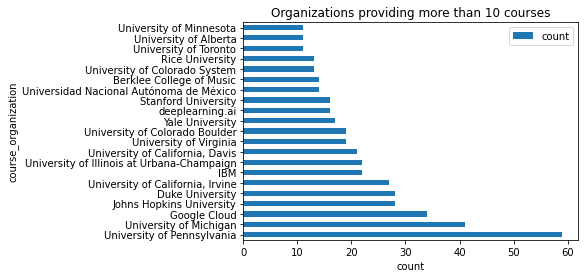

In [14]:
course_org_greater_than_ten.plot(kind='barh', x='course_organization', y='count')
plt.title('Organizations providing more than 10 courses')
plt.xlabel('count')
plt.show()

Most of the courses are provided by University of Pennsylvania
>- From the above frame we can clearly see from their count that <b> University of Pennsylvania </b> is the top university according to their count,
>- <b> University of Pennsylvania </b> is proving the various courses in Coursera where students can have get their certification according to their needs.
>- It is one of the top rated university in the world.
>- It is also noted for the students there are 19 top universities which are providing more than 10 courses.So it is worth checking if they want to enrol any courses.

# What are the types of certificates avaiable

Text(0.5, 1.0, 'Type of certificate provided')

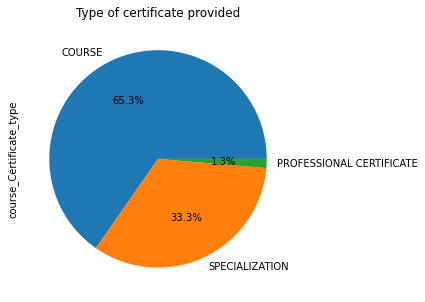

In [15]:
ax = coursera_df['course_Certificate_type'].value_counts().plot(kind='pie',autopct="%.1f%%", figsize=(10,5))
ax.set_title('Type of certificate provided')

65.3% of the courses are normal courses and there are very less(1.3%) courses that provide a professional certificate

# What is the type of certificate that has maximum number of enrollments

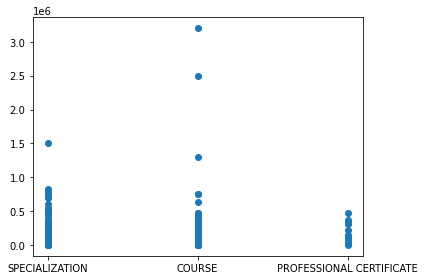

In [16]:
ax = plt.scatter(x='course_Certificate_type',y='course_students_enrolled',data=coursera_df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Most of the people have enrolled for a normal course certificate than a specialised or a professional certificate course
>- There are very less students who have enrolled for a professional certificate

In [17]:
coursera_df['course_difficulty'].value_counts()

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

Text(0.5, 1.0, 'difficulty level of course')

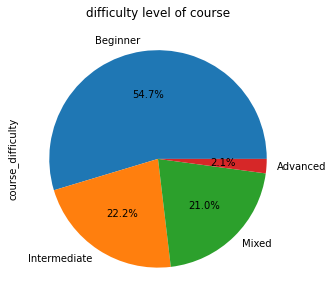

In [18]:
ax = coursera_df['course_difficulty'].value_counts().plot(kind='pie',autopct="%.1f%%", figsize=(10,5))
ax.set_title('difficulty level of course')

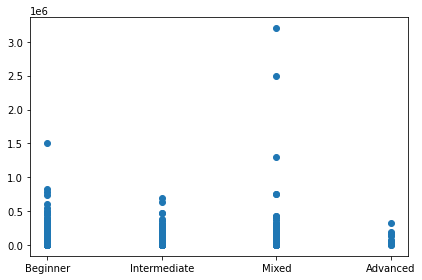

In [19]:
ax = plt.scatter(x='course_difficulty',y='course_students_enrolled',data=coursera_df)
plt.tight_layout()
plt.show()

Most of the students have enrolled for mixed courses

We can see from the above analysis that difficultty of courses affects in certain manner for enrolling students. Although we saw previously that the number of students enrolled in coursera in the beginar courses. But here we can see that it slightly changed in term of enrolling according to the difficulty. But overall yes, we can say that the difficulty of course affect to enrolling the students.

In [20]:
#TOP 10 COURSES ON COURSERA
top10 = coursera_df.loc[:,['course_title', 'course_students_enrolled']]
top10 = top10.sort_values(by=['course_students_enrolled'], ascending=False)
top10 = top10.head(10)
pd.DataFrame(top10)

course_title  \
564                                   Machine Learning   
815                          The Science of Well-Being   
688                               Python for Everybody   
674  Programming for Everybody (Getting Started wit...   
196                                       Data Science   
129                                     Career Success   
261                     English for Career Development   
765  Successful Negotiation: Essential Strategies a...   
199                  Data Science: Foundations using R   
211                                      Deep Learning   

     course_students_enrolled  
564                   3200000  
815                   2500000  
688                   1500000  
674                   1300000  
196                    830000  
129                    790000  
261                    760000  
765                    750000  
199                    740000  
211                    690000

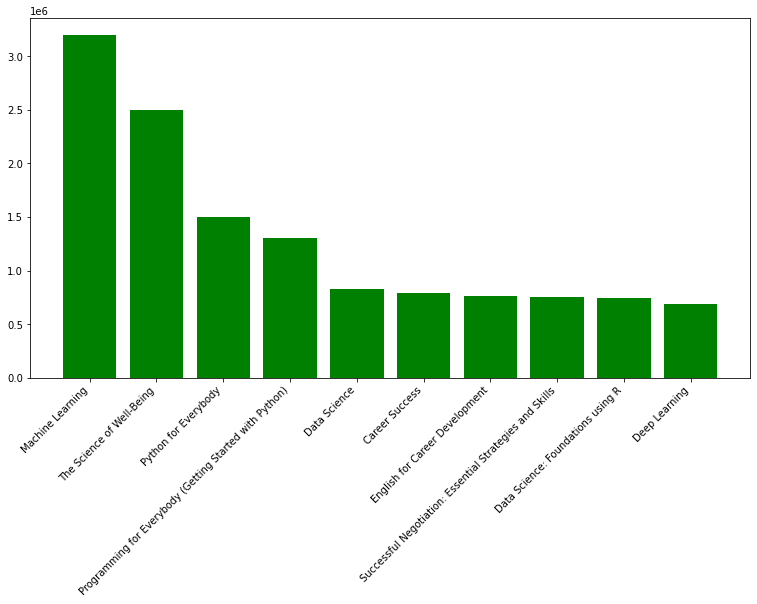

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(top10['course_title'], top10['course_students_enrolled'], color="green")
plt.xticks(rotation=45,ha='right')
plt.show()

Most of the students have enrolled for machine learning course

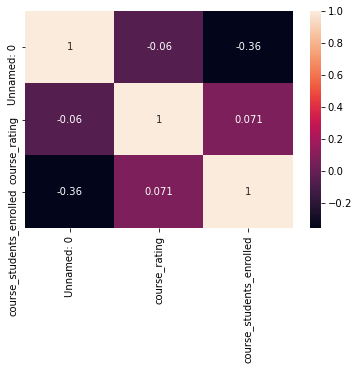

In [22]:
#This heatmap show that there is a high correlation between course_rating
#and course_student_enrolment. Its mean if the course_rating
#is high then definately student enroll those course

sns.heatmap(coursera_df.corr(), annot=True)

plt.show()

# The course in which most of the students have enrolled have what rating

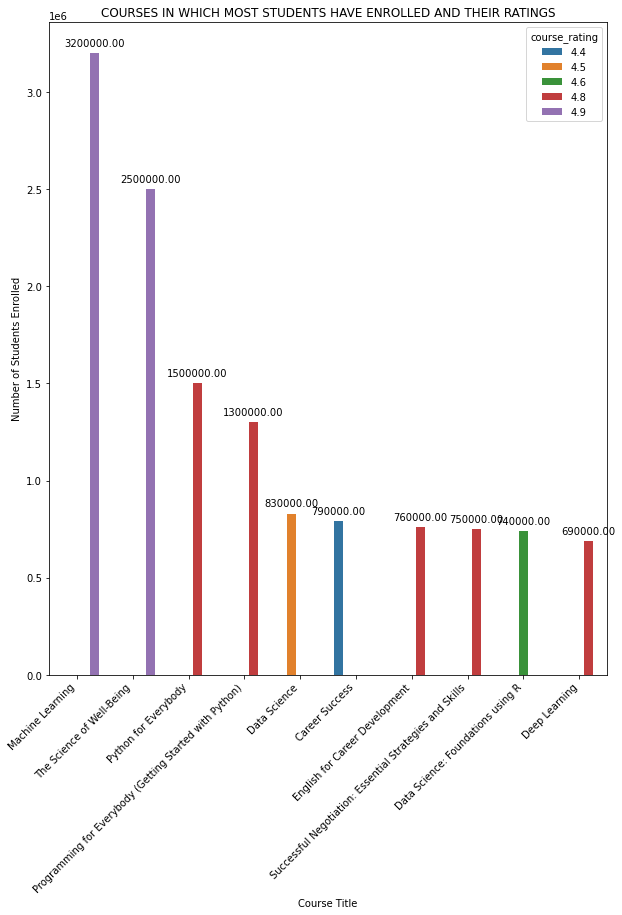

In [23]:
#COURSES WITH MOST STUDENTS ENROLLMENT AND THEIR RATINGS
large=coursera_df.nlargest(10, ['course_students_enrolled'])


plt.figure(figsize=(10,12))
g = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating",data=large)
plt.xlabel('Course Title')
plt.ylabel('Number of Students Enrolled')
plt.title("COURSES IN WHICH MOST STUDENTS HAVE ENROLLED AND THEIR RATINGS")


for p in g.patches:
    
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=45,ha='right')
plt.show()

Machine learning is the course that have most of the students enrolled and have 4.9 rating

<ipython-input-24-38616031e4a3>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


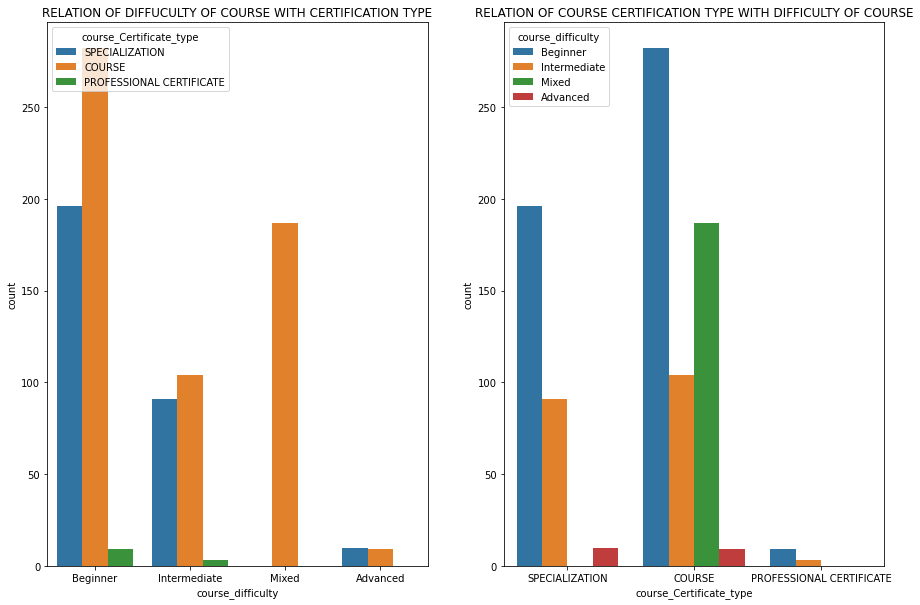

In [24]:
figure, ax =plt.subplots(1,2, figsize= (15,10))


sns.countplot(coursera_df['course_difficulty'], ax=ax[0], hue=coursera_df['course_Certificate_type'])
ax[0].set_title("RELATION OF DIFFUCULTY OF COURSE WITH CERTIFICATION TYPE")


sns.countplot(coursera_df['course_Certificate_type'], ax=ax[1], hue=coursera_df['course_difficulty'])
ax[1].set_title("RELATION OF COURSE CERTIFICATION TYPE WITH DIFFICULTY OF COURSE")


figure.show()
plt.show()


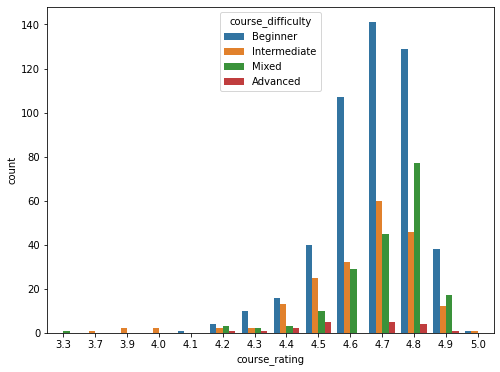

In [25]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=coursera_df,x = 'course_rating',hue= 'course_difficulty',ax=ax)
plt.show()

In [26]:
#Finding the total students enrolled for each course difficulty category
vin = pd.DataFrame({'total_students_enrolled' : coursera_df.groupby('course_difficulty').sum()['course_students_enrolled']}).reset_index()
vin

course_difficulty  total_students_enrolled
0          Advanced                  1264400
1          Beginner                 39921800
2      Intermediate                 14506300
3             Mixed                 24989400

>-Most of the students have enrolled for the beginner course that have a normal certificate type for the course and have a rating of 4.7 

In [31]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [39]:
review_df.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

The dataset consists of 1454711 rows and 5 columns and 140 reviews are missing from the dataset. There is only one column that have an integer datatype.

In [32]:
review_df.describe()

rating
count  1.454711e+06
mean   4.696649e+00
std    6.983271e-01
min    1.000000e+00
25%    5.000000e+00
50%    5.000000e+00
75%    5.000000e+00
max    5.000000e+00

The minumum rating for a course is 1 and the maximum rating is 5

In [27]:
review_df.head()

reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   
3  A few grammatical mistakes on test made me do ...       By Dale B   
4  Excellent course and the training provided was...       By Sean G   

   date_reviews  rating                 course_id  
0  Feb 12, 2020       4  google-cbrs-cpi-training  
1  Sep 28, 2020       4  google-cbrs-cpi-training  
2  Apr 08, 2020       4  google-cbrs-cpi-training  
3  Feb 24, 2020       4  google-cbrs-cpi-training  
4  Jun 18, 2020       4  google-cbrs-cpi-training

In [70]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
df=review_df[['reviews','rating']]

In [45]:
df.head()

reviews  rating
0  Pretty dry, but I was able to pass with just t...       4
1  would be a better experience if the video and ...       4
2  Information was perfect! The program itself wa...       4
3  A few grammatical mistakes on test made me do ...       4
4  Excellent course and the training provided was...       4

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   reviews  1454571 non-null  object
 1   rating   1454711 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 22.2+ MB


In [47]:
df= df.drop_duplicates()

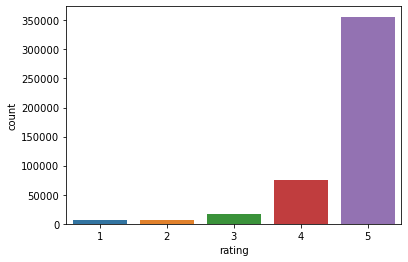

In [48]:
sns.countplot(x="rating",data=df)

Most of the courses have the maximum rating of 5

In [49]:
sentiment = []

for i in df["rating"]:
    if i == 5:
        sentiment.append(1)
    elif (i == 4) or (i == 3) or (i == 2) or (i == 1):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["Sentiment"] = sentiment

In [52]:
df.head(10)

reviews  rating  Sentiment
0  Pretty dry, but I was able to pass with just t...       4          0
1  would be a better experience if the video and ...       4          0
2  Information was perfect! The program itself wa...       4          0
3  A few grammatical mistakes on test made me do ...       4          0
4  Excellent course and the training provided was...       4          0
5  Some of the quizzes contained material not exp...       4          0
6  Solid presentation all the way through. I real...       5          1
7  Probably the best certification course I've ta...       5          1
8  The ProctorU.com system took 2 times the amoun...       5          1
9  Covered all of the required information in an ...       5          1

In [53]:
stop_words = set(stopwords.words("english"))

In [54]:
df["reviews"] = df["reviews"].str.replace("\d","")

In [71]:
def cleaner(data):
    # Tokens
    token = word_tokenize(str(data).replace("'", "").lower()) 
    
    # Remove Puncs
    without_puncs = [w for w in token if w.isalpha()]
    
    # Stopwords
    without_stopwords = [t for t in without_puncs if t not in stop_words]
    
    # Lemmatize
    text_lem = [WordNetLemmatizer().lemmatize(t) for t in without_stopwords]
    # Stem
    text_cleaned = [PorterStemmer().stem(w) for w in text_lem]
    
    return " ".join(text_cleaned)

In [72]:
df["reviews"] = df["reviews"].apply(cleaner)
df["reviews"].head()

0    pretti dri abl pa two complet watch im happi u...
1    would better experi video screen shot would sh...
2    inform perfect program littl annoy wait minut ...
3              grammat mistak test made doubl take bad
4          excel cours train provid detail easi follow
Name: reviews, dtype: object

In [73]:
df["reviews"]=df["reviews"].str.replace("im","")
df["reviews"].head()

0    pretti dri abl pa two complet watch  happi usu...
1    would better experi video screen shot would sh...
2    inform perfect program littl annoy wait minut ...
3              grammat mistak test made doubl take bad
4          excel cours train provid detail easi follow
Name: reviews, dtype: object

In [74]:
#let's find some rare words
rare_words = pd.Series(" ".join(df["reviews"]).split()).value_counts()
rare_words

cours              345971
learn              122685
great               84608
good                79700
thank               65390
                    ...  
zzzz                    1
семестровый             1
nsight                  1
habitacion              1
americanessenti         1
Length: 77230, dtype: int64

In [75]:
rare_words = rare_words[rare_words <= 2]

In [76]:
df["reviews"] = df["reviews"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

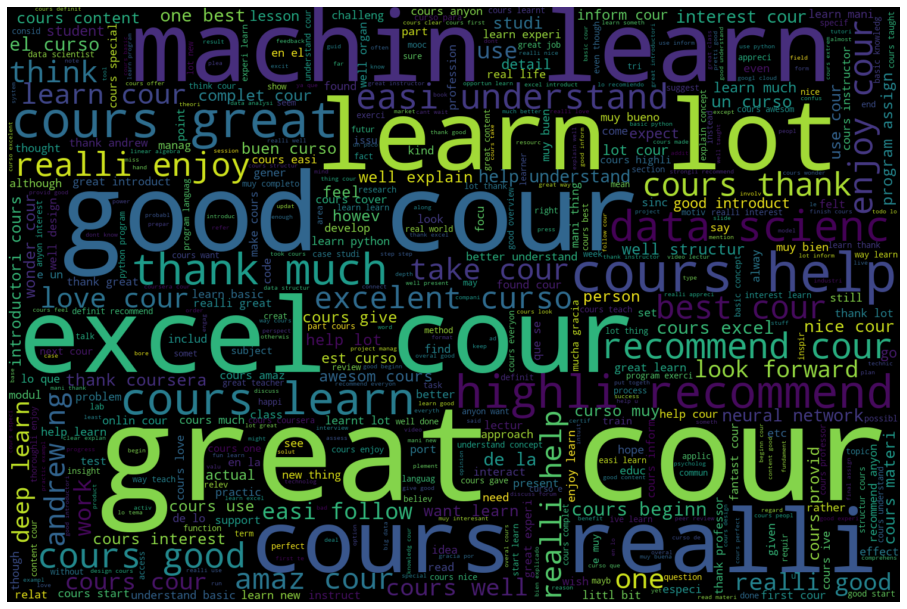

In [78]:
#create a wordcloud
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['reviews']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most of the reviews have a positive impact
> the machine learning course have the most positive reviews

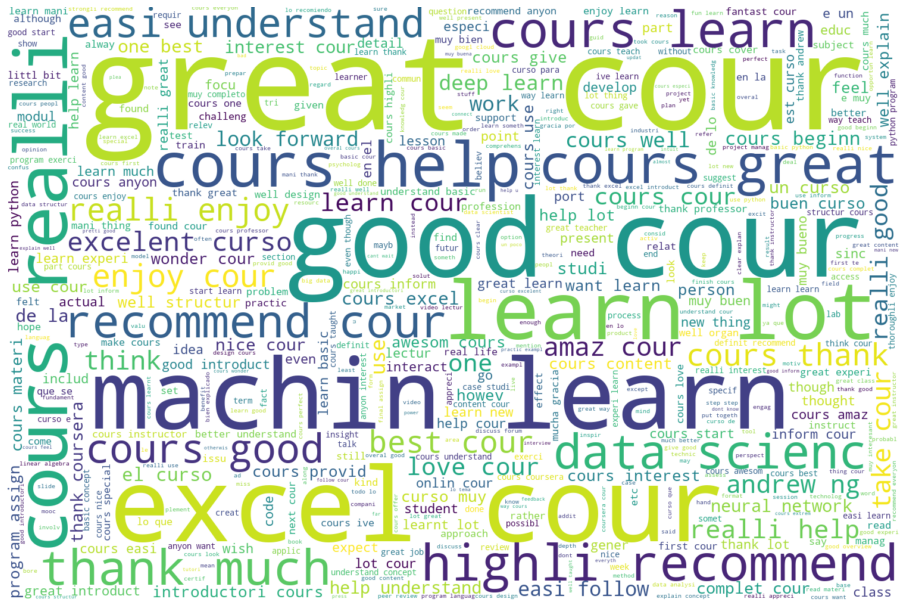

In [81]:
#create a wordcloud
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="white",max_words=500, width=1500, height=1000).generate(' '.join(df['reviews']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# What course aspects mentioned in textual reviews tend to influence overall review scores?

> the machine learning course provided by the University of Pennsylvania have the highest rating and the most positive review with the maximum rating of 5 stars.

In [89]:
courses_df=pd.read_csv("courses.csv")

In [90]:
courses_df.head()

name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          course_url  \
0    https://www.coursera.org/learn/machine-learning   
1   https://www.coursera.org/learn/indigenous-canada   
2  https://www.coursera.org/learn/the-science-of-...   
3  https://www.coursera.org/learn/technical-suppo...   
4  https://www.coursera.org/learn/google-cbrs-cpi...   

                        course_id  
0                machine-learning  
1               indigenous-canada  
2       the-science-of-well-being  
3  technical-support-fundamentals  
4        google-cbrs-cpi-training

In [91]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


The dataset consists of 623 non-null rows and 4 columns. Every column is of object datatype.

In [92]:
courses_df.describe()

name                 institution  \
count                          623                         623   
unique                         622                         134   
top     Introduction to Psychology  University of Pennsylvania   
freq                             2                          43   

                                               course_url   course_id  
count                                                 623         623  
unique                                                623         623  
top     https://www.coursera.org/learn/finanzas-person...  journalism  
freq                                                    1           1

In [100]:
courses_df['institution'].value_counts()

University of Pennsylvania           43
University of Michigan               31
Duke University                      24
Google Cloud                         22
IBM                                  18
                                     ..
Delft University of Technology        1
The University of Chicago             1
EDHEC Business School                 1
Advancing Women in Product            1
Universidade Estadual de Campinas     1
Name: institution, Length: 134, dtype: int64

University of Pennsylvania provides most of the courses


Couse URL and Course ID is not needed for any analysing, so, we can drop those columns from the dataset in order to avoid ambiguilty

In [101]:
courses_df=courses_df[['name','institution']]

In [102]:
courses_df.head()

name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  
0        Stanford University  
1      University of Alberta  
2            Yale University  
3                     Google  
4  Google - Spectrum Sharing

In [103]:
# Removing spaces between the words (Lambda funtions can be used as well)

courses_df['name'] = courses_df['name'].str.replace(' ',',')
courses_df['name'] = courses_df['name'].str.replace(',,',',')
courses_df['name'] = courses_df['name'].str.replace(':','')

In [104]:
courses_df.head()

name  \
0                                   Machine,Learning   
1                                  Indigenous,Canada   
2                          The,Science,of,Well-Being   
3                     Technical,Support,Fundamentals   
4  Become,a,CBRS,Certified,Professional,Installer...   

                 institution  
0        Stanford University  
1      University of Alberta  
2            Yale University  
3                     Google  
4  Google - Spectrum Sharing

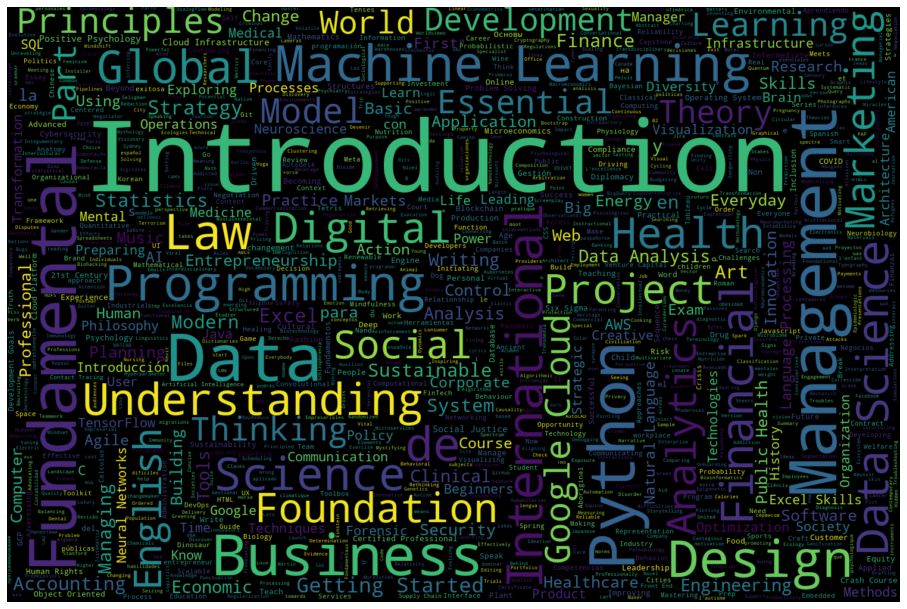

In [108]:
#create a wordcloud
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=1000, width=1500, height=1000).generate(' '.join(courses_df['name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>The courses related to data, business, fundamentals, python, management, design and machine learning are more famous than any other course.

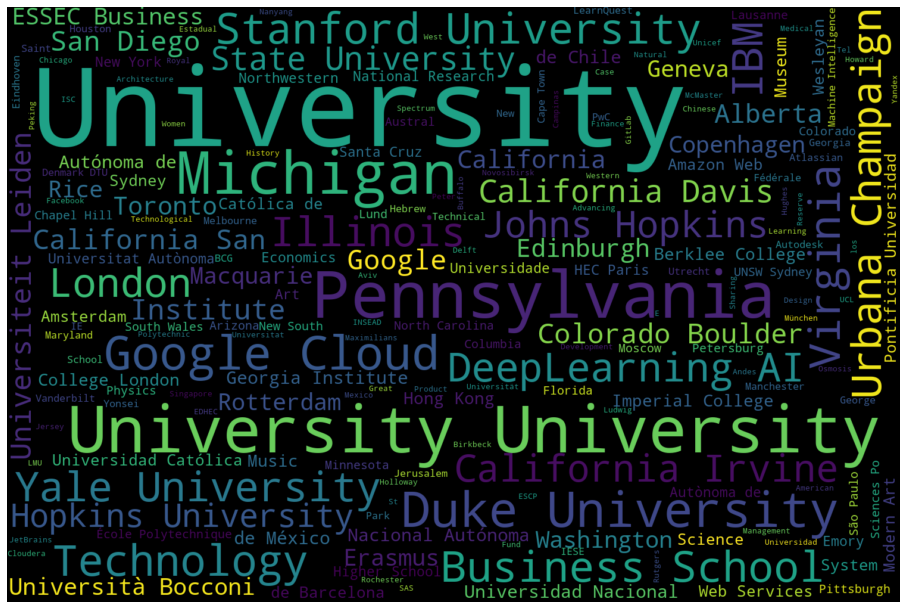

In [110]:
#create a wordcloud
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=1000, width=1500, height=1000).generate(' '.join(courses_df['institution']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> University of Pennsylvania and Michigan are most popular for their courses.

In [156]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.figure_factory as ff

In [111]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


 The data consists of 3678 non null rows and 12 columns. 
 There are 5 columns that have integer datatype, 5 columns with object datatype, 1 column with float datatype and 1 columns with boolean(True or False) datatype

In [112]:
udemy_df.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

In [146]:
udemy_df.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.678000e+03  3678.000000      3678.000000   3678.000000   3678.000000   
mean   6.759720e+05    66.049483      3197.150625    156.259108     40.108755   
std    3.432732e+05    61.005755      9504.117010    935.452044     50.383346   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.076925e+05    20.000000       111.000000      4.000000     15.000000   
50%    6.879170e+05    45.000000       911.500000     18.000000     25.000000   
75%    9.613555e+05    95.000000      2546.000000     67.000000     45.750000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

       content_duration  
count       3678.000000  
mean           4.094517  
std            6.053840  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.500000  
max           78.500000

Objectify the date and time of the published_timestamp column data

In [113]:
udemy_df['published_timestamp']= pd.to_datetime(udemy_df['published_timestamp'])

In [114]:
udemy_df.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration       published_timestamp           subject  
0               1.5 2017-01-18 20:58:58+00:00  Business Finance  
1              39.0 2017-03-09 16:34:20+00:00  Business Finance  
2               2.5 2016-12-19 19:26:30+00:00  Business Finance  
3               3.0 2017-05-30 20:07:24+00:00  Business Finance  
4               2.0 2016-12-13 14:57:18+00:00  Business Finance

# How many courses are paid?

Text(0.5, 1.0, 'number of courses that are paid and unpaid')

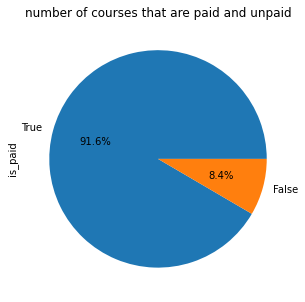

In [115]:
ax = udemy_df['is_paid'].value_counts().plot(kind='pie',autopct="%.1f%%", figsize=(10,5))
ax.set_title('number of courses that are paid and unpaid')

91.6% of courses are paid and 8.4% of courses are not paid
>Most of the courses are paid

In [116]:
subjects=udemy_df.groupby(udemy_df['subject'])['course_title'].count()

In [118]:
#to get the subjects
subjects

subject
Business Finance       1195
Graphic Design          603
Musical Instruments     680
Web Development        1200
Name: course_title, dtype: int64

Text(0.5, 1.0, 'courses provided')

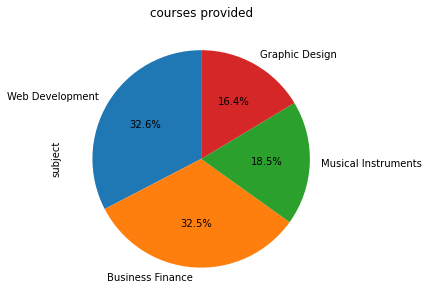

In [131]:
fig=udemy_df['subject'].value_counts().plot(kind='pie',autopct="%.1f%%", figsize=(10,5),startangle=90)
fig.set_title("courses provided")


Web development is the most popular course of udemy

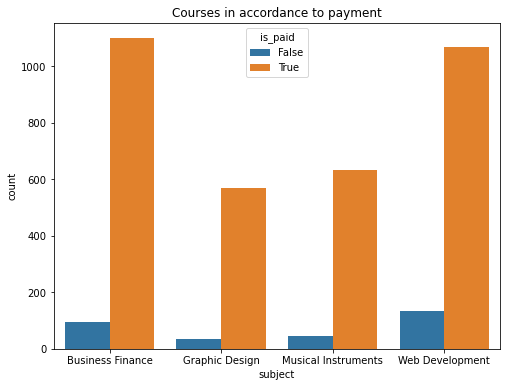

In [151]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=udemy_df,x = 'subject',hue= 'is_paid',ax=ax)
plt.title("Courses in accordance to payment")
plt.show()


The students are paying more for the business finance course.
>The least paid course is graphic design

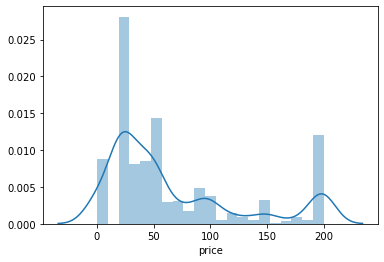

In [145]:
sns.distplot(udemy_df['price'])

In [169]:
udemy_df['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

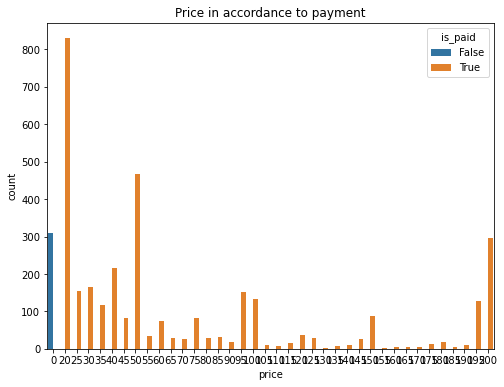

In [168]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=udemy_df,x = 'price',hue= 'is_paid',ax=ax)
plt.title("Price in accordance to payment")
plt.show()

Mostly the price of a particular course varies between 0-50
>- Most paid course is for 20
>- 310 courses are not paid

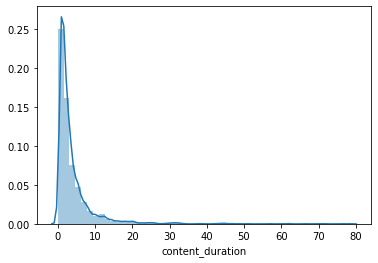

In [147]:
sns.distplot(udemy_df['content_duration'])

# Relation between the price and the duration of the course

Text(0, 0.5, 'Content Duration')

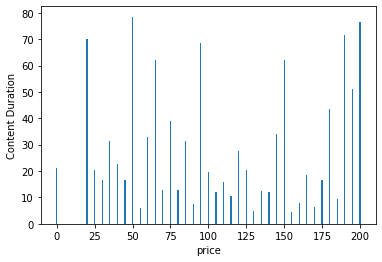

In [161]:
plt.bar(x = udemy_df['price'], height =udemy_df['content_duration'])
plt.xlabel("price")
plt.ylabel("Content Duration")

The course that have the most content duration costs $50

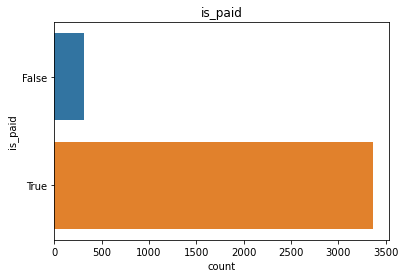

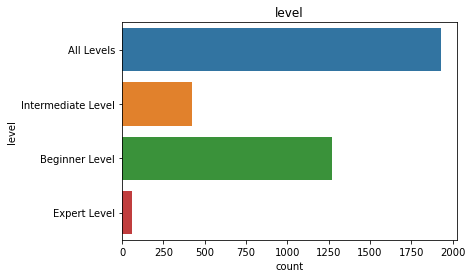

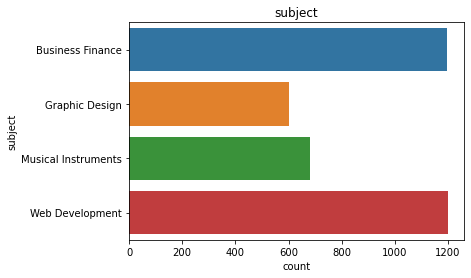

In [150]:
columns=['is_paid','level','subject']
for i in columns:
    plt.title(i)
    sns.countplot(y =i, data = udemy_df)
    
    plt.show()

Web development for all levels which is a paid course is the most popular course of udemy
> IT domain is working best for customers

In [158]:
subjects=pd.DataFrame(udemy_df["subject"].value_counts().reset_index())
fig=go.Figure(data=[go.Pie(labels=subjects["index"],
                          values=subjects["subject"],
                          hole=.7,
                          title="Course with higest percentage",
                          marker_colors=px.colors.sequential.RdBu,)])



fig.update_layout(title="Percentage of courses:")
fig.show()

# What is the content duration for each subject?


In [170]:
fig=px.box(udemy_df,x="content_duration",y="subject",orientation="h",color="is_paid",
          title="Content duration according to subject and type of course",
          color_discrete_sequence=["#03cffc",'#eb03fc'])
fig.update_xaxes(title="content duration")
fig.update_yaxes(title="course subject")
fig.show()

>- Graphic design course have the most content duration
>- Least content duration is for the musical instruments subject

In [172]:
# Price distribution according to the subjects
fig = px.histogram(udemy_df, 
                   x='price',
                   text_auto=True,
                   color='subject',
                   title='Price Distribution')
fig.show()

>- Most of the sudents have enrolled for the business finance course that have a price of 20
>- Graphic design is the least paying course

# Which subject have the most number of lectures

In [177]:
fig=px.funnel_area(names=udemy_df["subject"],
                  values=udemy_df["num_lectures"],
                  title="Number of lectures",width=500,height=500,
                  color_discrete_sequence=["pink","wheat","blue","red"])


fig.show()

>- Most number of lectures are given for the web development course
>- Least number of lectures are given for the graphic designing course

# Most subscribed courses

In [178]:
subscribe_df=udemy_df.sort_values(by='num_subscribers')
fig = px.histogram(subscribe_df.tail(30), 
                   y="course_title", 
                   x='num_subscribers',
                   text_auto=True,
                   color='is_paid',
                   title='Most Subscribed Courses')
fig.show()

In [179]:
subscribe_df=udemy_df.sort_values(by='num_subscribers')
fig = px.histogram(subscribe_df.tail(30), 
                   y="subject", 
                   x='num_subscribers',
                   text_auto=True,
                   color='is_paid',
                   title='Most Subscribed Courses')
fig.show()

In [181]:
#Split the data based on paid or unpaid
free=udemy_df[udemy_df["price"]==0]
paid=udemy_df[udemy_df["price"]!=0]

In [182]:
#creation of a function to find which course is the most paid and the least paid
def generate_df(udemy_df):
    new=udemy_df.groupby(["subject"]).agg({"course_id":"count"}).reset_index()
    new=new[new["course_id"]!=0]
    new.columns=["subject","counts"]
    new=new.sort_values("counts")
    return new

In [183]:
new_free= generate_df(free)
new_paid= generate_df(paid)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(labels=new_free['subject'], values=new_free['counts']), row=1, col=1)
fig.add_trace( go.Pie(labels=new_paid['subject'], values=new_paid['counts']), row=1, col=2)
fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name", marker = dict(line = dict(color = "white", width = 2)))
fig.update_layout(title_text="Which courses is free and Paid",annotations=[dict(text='Free ', x=0.18, y=0.5, font_size=17, showarrow=False, font_color='black'), dict(text='Paid ', x=0.83, y=0.5, font_size=17, showarrow=False, font_color='black')])
fig.show()

>- Coding for entrepreneurs is the most subscribed course that is unpaid
>- Web developer bootcamp is the most subscribed course that is paid
Inference
>- Web development subject is the free course  
>- Business finance is most paid course

In [187]:
level=pd.DataFrame(udemy_df["level"].value_counts().reset_index())
colorscale=[[0,"#272D31"],[.5,"#ffffff"],[1,"#ffffff"]]
fig=ff.create_table(level,colorscale=colorscale)

x=level["index"]
y=level["level"]


fig.add_trace(go.Scatter(x=x,y=y,
                        marker=dict(color="#0099ff"),
                        name="Which level has the most additional courses",
                        xaxis="x2",yaxis="y2"))

(array([1929.,    0.,    0.,    0.,    0.,  421.,    0.,    0.,    0.,
           0., 1270.,    0.,    0.,    0.,   58.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. ]),
 <a list of 15 Patch objects>)

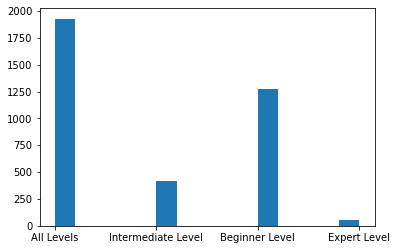

In [193]:
plt.hist(x=udemy_df['level'],bins=15)

The students enroll mostly for all levels of courses

# Which year has the most published courses?

In [189]:
import datetime as dt
udemy_df['year']= udemy_df['published_timestamp'].dt.year

In [190]:
subject_year = udemy_df.groupby('year')['subject'].value_counts().reset_index(level=0)

In [192]:
px.line(subject_year, x="year", y="subject",color= subject_year.index)

Most of the courses are punlished in the year 2016

In [194]:
px.histogram(udemy_df,x="year",y="num_subscribers")

Most subscribers are in the year 2015